In [70]:
import pandas as pd
import re
import os
from spherical_fields import *
import spherical_fields
import field_regularizer
import mhd_system
from settings import Settings
import matplotlib.pyplot as plt
import importlib
importlib.reload(mhd_system)
importlib.reload(field_regularizer)

def read_lesur(filename):
    global data
    data = pd.read_csv(filename, skiprows=6, delimiter="\t+", engine='python')
    data.columns = [x.split(" ")[0] for x in data.columns]
    thetas = data.theta.to_numpy()
    cs = ScalarField(np.sqrt((data.P/data.rho).to_numpy()), 0, thetas)
    beta, Rm_0, Lambda_a_0 = [float(x) for x in re.findall("=(inf|[^-]+)", filename)]
    lambda_ = 3
    parameter_rep = np.concatenate([data[field] for field in ["rho", "vr", "vtheta", "vphi", "Btheta", "Bphi"]])
    regularized_fields = field_regularizer.field_regularizer(parameter_rep, thetas, cs, beta, Sigma = 1)
    return mhd_system.mhd_system(cs, Lambda_a_0, Rm_0, lambda_), regularized_fields


for file in os.listdir("../PPDwind"):
    if ".dat" in file:
        mhd_sim, regularized_fields = read_lesur("../PPDwind/" + file)
        #plt.plot(theta,cs2.v)
        #plt.semilogy(rho.theta_grid,rho.v)
        #plt.xlim(np.pi/2-0.01, np.pi/2+0.01)
        break

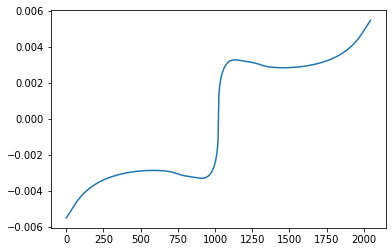

In [71]:
B = VectorField(data.Br.to_numpy(), data.Btheta.to_numpy(), data.Bphi.to_numpy(), -5/4, data.theta.to_numpy())
plt.plot(B.curl().v_theta)
#plt.plot(B.curl().cross(B[1:-1]).v_theta/(np.pi*4))
#plt.plot(v.tensor_deriv(v*rho).v_phi)
#plt.plot((v*rho).div().v)
#plt.xlim(1000, 1050)
#plt.yscale("symlog", linthresh=0.001)

In [72]:
def plot_system(rho, v, B, axes):
    rho_ax, v_ax, B_ax = axes
    rho_ax.plot(rho.theta_grid, rho.v, color="k")
    rho_ax.set_title("rho")
    v_ax.plot(v.theta_grid, v.v_r, color="blue")
    v_ax.plot(v.theta_grid, v.v_theta, color="red")
    v_ax.plot(v.theta_grid, v.v_phi, color="green")
    v_ax.set_title("v")
    v_ax.legend(["r", "theta", "phi"])
    B_ax.plot(B.theta_grid, B.v_r, color="blue")
    B_ax.plot(B.theta_grid, B.v_theta, color="red")
    B_ax.plot(B.theta_grid, B.v_phi, color="green")
    B_ax.set_title("B")
    B_ax.grid()
    B_ax.legend(["r", "theta", "phi"])

(1.4707963267948965, 1.6707963267948966)

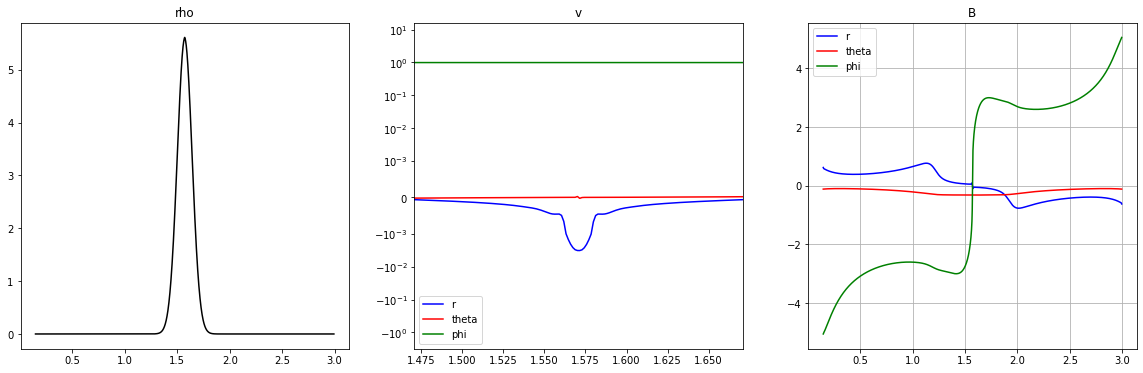

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_system(regularized_fields.rho, regularized_fields.v,
            regularized_fields.B, axes)
axes[1].set_yscale("symlog", linthresh=0.001)
axes[1].set_xlim(np.pi/2-0.1, np.pi/2+0.1)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


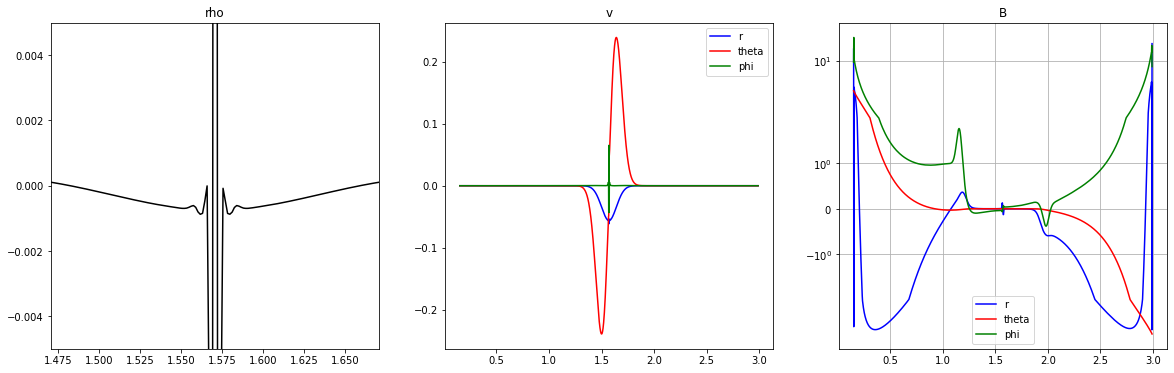

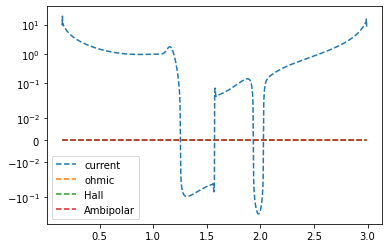

In [75]:
importlib.reload(mhd_system)
importlib.reload(field_regularizer)
#importlib.reload(spherical_fields)
import units
np.seterr("raise", over="ignore", under="ignore")

mhd_sim, regularized_fields = read_lesur("../PPDwind/" + file)
rho = regularized_fields.rho
v = regularized_fields.v
B = regularized_fields.B
fig, axes = plt.subplots(1, 3, figsize=(20,6))
mhd_sim.cs.v *= 1
units.constants.GM = 1
plot_system(mhd_sim.get_rho_dt(rho, v), mhd_sim.get_rho_v_dt(rho, v, B), mhd_sim.get_B_dt(rho, v, B), axes)
axes[0].set_ylim(-0.005, 0.005)
axes[0].set_xlim(np.pi/2-0.1,np.pi/2+0.1)
#axes[0].set_xlim(np.pi/2-0.05, np.pi/2+0.05)
#axes[2].set_xlim(np.pi/2-0.05, np.pi/2+0.05)
#axes[0].set_yscale("symlog")
#axes[1].set_yscale("symlog")
axes[2].set_yscale("symlog")
#plt.xlim(np.pi/2-0.01,np.pi/2+0.01)


In [ ]:
plt.plot(rho.theta_grid, mhd_sim.cs.as_cylendrical())

In [ ]:
plt.plot(rho.theta_grid, mhd_sim.cs)

In [ ]:
plt.plot((rho*v).v_r)

In [ ]:
import units
units.constants.GM = 1
units.constants.c = 0.1

In [ ]:
(rho*v).v_r.sum()